In [51]:
from brian2 import *
from matrices import import_light, import_dog_inh, import_v1
%matplotlib inline
import matplotlib.gridspec as gridspec
import numpy as np
import pytime

def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

nL1 = nL2 = 5**2
n = np.sqrt(nL1).astype(int)

[X,Y] = np.meshgrid(np.linspace(1,n,n,dtype=int), np.linspace(1,n,n,dtype=int))

taum = 10*ms
taue = taui = 5*ms
duration = 500*ms

eqsPOISSON ='''
rates : Hz
x : 1 (constant)
y : 1 (constant)
'''

eqsCUBALIF ='''
dv/dt  = (ge-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
x : 1 (constant)
y : 1 (constant)
'''

L1 = NeuronGroup(nL1,
                 eqsPOISSON,
                 threshold='rand()<rates*dt')

L1.x = X.flatten()
L1.y = Y.flatten()
pat = import_light()
ind = 0
L1.rates = pat[ind]*100*Hz

L2 = NeuronGroup(nL2,
                 eqsCUBALIF,
                 threshold = 'v>0.3*volt',
                 reset = 'v=0*volt',
                 refractory = 5*ms,
                 method = 'euler')

L2.x = X.flatten()
L2.y = Y.flatten()

e1 = Synapses(L1, L2, 'w : volt', on_pre='ge += w')
e1.connect(condition = 'i==j')
e1.w = 8*volt

i1 = Synapses(L1, L2, 'w : volt', on_pre='ge -= w')
i1.connect(condition = 'sqrt((x_pre - x_post)**2 + (y_pre-y_post)**2) < 2 and i!=j')
i1.w = 1*volt

sp1 = SpikeMonitor(L1)
sp2 = SpikeMonitor(L2)
run(duration)
mfr1 = sp1.count/duration
mfr2 = sp2.count/duration

In [52]:
mfr1.reshape(5,5)

array([[  0.,  90., 122., 100.,  86.],
       [102.,   0.,   0.,   0.,   0.],
       [106.,   0.,   0.,   0.,   0.],
       [100.,   0.,   0.,   0.,   0.],
       [  0.,  96.,  84.,  84., 114.]]) * hertz

In [53]:
mfr2.reshape(5,5)

array([[  0.,  98., 126., 112., 112.],
       [116.,   0.,   0.,   0.,   0.],
       [116.,   0.,   0.,   0.,   0.],
       [ 98.,   0.,   0.,   0.,   0.],
       [  0., 118., 104., 104., 130.]]) * hertz

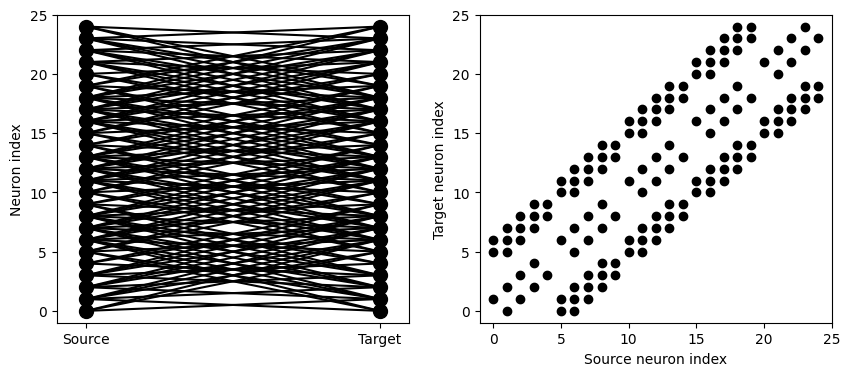

In [54]:
visualise_connectivity(i1)